In [6]:
TIMPATH="../data/xtra-ankara/times_par10_to3600.csv.gz"
FEATPATH="../data/solving-and-features/features-f2f.csv.gz" # the smallest set
UPTO=16
WIDTH=4.5
FIGOUT="/tmp/portfolios-times.pdf"

import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path.append("../scripts")
from fullcycle import _makePortfolio, _portfolioVB
sys.path.append(".")
from plot_utils import fixEncsV

In [7]:
feats = pd.read_csv(FEATPATH)
feats['ID']=feats.ProblemDir+'/'+feats.ParamFile
t = pd.read_csv(TIMPATH)
t = t.loc[t.ID.isin(feats.ID)]

def _mp(size):
    print(f"{size}.. ",end="",flush=True)
    _p =  _makePortfolio(size,t)
    print(f"..{size} ",end="",flush=True)    
    return _p

with mp.Pool(6) as pool:
    portfolios = pool.map(_mp,range(1,1+UPTO))

1.. 4.. 2.. 3.. 5.. 6.. ..1 7.. ..2 8.. ..3 9.. ..4 10.. ..5 11.. ..6 12.. ..8 13.. ..7 14.. ..9 15.. ..10 16.. ..11 ..13 ..12 ..14 ..15 ..16 

In [8]:
df = pd.DataFrame(
    {'portfolio': [','.join(p) for p in portfolios],
     'vb': [_portfolioVB(t,p,{}) for p in portfolios],
     'size': [len(p) for p in portfolios]}
)
print(df)
df['portfolio'] = fixEncsV(df.portfolio)

for i in range(UPTO):
    print(f'Size {i+1}:',df.iloc[i].portfolio)

                                            portfolio           vb  size
0                                            gpw_tree  746069.1815     1
1                                   tree_tree,gpw_gpw  230010.5595     2
2                          tree_tree,gpw_gpw,gpw_ggth  122779.3695     3
3                 tree_tree,gpw_gpw,gpw_ggth,ggth_mdd   87457.0235     4
4        rggt_tree,gpw_gpw,tree_mdd,gpw_ggth,ggth_mdd   82677.5380     5
5   rggt_tree,gpw_gpw,tree_mdd,gpw_ggth,ggth_mdd,g...   79128.5020     6
6   rggt_tree,gpw_gpw,tree_mdd,gpw_ggth,ggth_mdd,g...   77775.4280     7
7   lpw_gmto,gpw_tree,gpw_gpw,tree_mdd,gpw_ggth,gg...   76326.8000     8
8   gpw_tree,gpw_gpw,tree_swc,gpw_ggth,ggth_mdd,rg...   74961.0680     9
9   gpw_tree,gpw_gpw,tree_swc,gpw_ggth,ggth_mdd,rg...   74098.8710    10
10  gpw_tree,gpw_gpw,tree_swc,gpw_ggth,ggth_mdd,rg...   73415.9830    11
11  gpw_tree,gpw_gpw,tree_swc,gpw_ggth,ggth_mdd,rg...   72817.7340    12
12  gpw_tree,gpw_gpw,tree_swc,gpw_ggth,ggth_mdd,rg.

    size  ratio_best
0      1   10.917238
1      2    3.365747
2      3    1.796632
3      4    1.279760
4      5    1.209821
5      6    1.157888
6      7    1.138089
7      8    1.116891
8      9    1.096906
9     10    1.084290
10    11    1.074297
11    12    1.065543
12    13    1.057336
13    14    1.050572
14    15    1.044597
15    16    1.038400


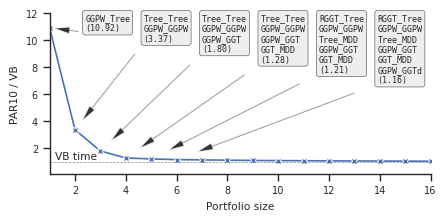

In [9]:
vb_overall = t.groupby('ID')['OverallTime'].min().sum()
df['ratio_best'] = df['vb']/vb_overall
print(df[['size','ratio_best']])

sns.set(context="paper", style="ticks", font_scale=0.8,
        rc={"font.family": "sans-serif"})

fig,ax = plt.subplots(figsize=(WIDTH,0.5*WIDTH))
g = sns.lineplot(
    data=df,x='size', y='ratio_best', ax=ax,
    markers=True, marker='X'
)
sns.despine(ax=ax)
ax.plot(range(1,df['size'].max()+1),[1]*len(df), 'k--', alpha=0.5,lw=0.5)
ax.annotate("VB time", xy=(1,1), xytext=(1.2,1.2))
ax.set_xlabel("Portfolio size")
ax.set_ylabel("PAR10 / VB")
ax.set(xlim=(1,16),ylim=(0.1,12))
# let's have some fun
yrange = df['ratio_best'].max() - df['ratio_best'].min()
ymax = df['ratio_best'].max()
for i in range(6):
    #lab = df.iloc[i]['portfolio'] + " ({:.2f})".format(df.iloc[i]['ratio_best'])
    portf = df.iloc[i]['portfolio'].replace(',','\n')
    ratio = df.iloc[i]['ratio_best']
    label = f"{portf}\n({ratio:.2f})"
    ax.annotate(
        label,
        xy = (i+1, float(df.iloc[i]['ratio_best'])) ,
        xytext = (2.4+2.3*i, 12),
        arrowprops=dict(facecolor='black', shrink=0.1,
                        headwidth=5, width=1.0, alpha=0.8),
        fontsize=6, ha='left', va='top', fontfamily='monospace',
        bbox=dict(boxstyle="round,pad=0.3", fc="#eeeeee", ec="#666666", lw=0.5),
    )
fig.tight_layout()
fig.savefig(FIGOUT,dpi=1200)

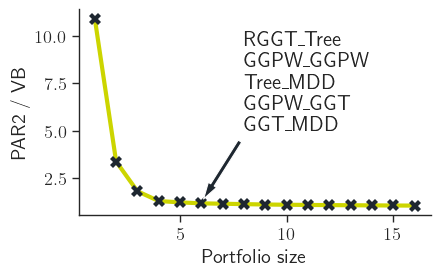

In [13]:
DK_COL='#1e2730'
LT_COL='#ccd500'
sns.set(
    context="paper", style="ticks", font_scale=1.5,
)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Fira"]})

fig,ax = plt.subplots(figsize=(4.5,3))
g = sns.lineplot(
    data=df,x='size', y='ratio_best', ax=ax,
    color=LT_COL, linewidth=3,
    markers=True, marker='X', markersize=8, markerfacecolor=DK_COL, markeredgewidth=0,
)
sns.despine(ax=ax)
ax.set_xlabel("Portfolio size")
ax.set_ylabel("PAR2 / VB")
# let's have some fun
yrange = df['ratio_best'].max() - df['ratio_best'].min()
ymax = df['ratio_best'].max()

lab = str(df.iloc[4]['portfolio']).replace(',','\n').replace('_',r'\_')
ax.annotate(
    lab,
    xy = (i+1, float(df.iloc[4]['ratio_best'])),
    xytext = (8, 5),
    arrowprops=dict(facecolor=DK_COL, shrink=0.05,
                    headwidth=7, width=3),
    fontsize=15,
)
fig.tight_layout()
fig.savefig("/tmp/poster-portfolios-times.pdf",dpi=1200)